<a href="https://colab.research.google.com/github/blacPanthe/ATHARVABAKDE.github.io/blob/master/Heart_Disease_Prediction_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Heart Disease Prediction Modeling**


Context:
Heart disease is one of the leading causes of mortality worldwide. Early detection of cardiovascular diseases can significantly improve patient outcomes by allowing timely medical intervention. This dataset consists of medical attributes collected from patients to predict the likelihood of heart disease. The goal is to analyze key health factors contributing to heart disease and build a classification model to predict whether a patient has heart disease or not.

Objective:
Identify the key factors that contribute to heart disease.
Develop a predictive model to classify patients as at risk or not at risk of heart disease.
Dataset Overview:
The dataset contains various demographic and medical parameters relevant to heart disease. Below is a description of the key features:

Feature	Description
Age	Age of the patient
Sex	Gender (1 = Male, 0 = Female)
CP (Chest Pain Type)	0 = Typical Angina, 1 = Atypical Angina, 2 = Non-Anginal Pain, 3 = Asymptomatic
Trestbps (Resting Blood Pressure)	Blood pressure in mmHg
Chol (Cholesterol Level)	Serum cholesterol in mg/dL
FBS (Fasting Blood Sugar > 120 mg/dL)	1 = True, 0 = False
Restecg (Resting Electrocardiographic Results)	0 = Normal, 1 = ST-T wave abnormality, 2 = Left ventricular hypertrophy
Thalach (Max Heart Rate Achieved)	Maximum heart rate recorded during exercise
Exang (Exercise-Induced Angina)	1 = Yes, 0 = No
Oldpeak (ST Depression Induced by Exercise)	Numeric value indicating depression in ST segment
Slope (Slope of Peak Exercise ST Segment)	0 = Upsloping, 1 = Flat, 2 = Downsloping
CA (Number of Major Vessels Colored by Fluoroscopy)	Ranges from 0 to 3
Thal (Thalassemia)	1 = Normal, 2 = Fixed defect, 3 = Reversible defect
Target (Heart Disease Presence)	1 = Heart Disease, 0 = No Heart Disease
Business Impact:
Predicting heart disease early can help:

Reduce hospital admissions by enabling preventive care.
Assist doctors in making informed decisions about further tests or treatments.
Improve healthcare efficiency by prioritizing high-risk patients.
Approach:
Exploratory Data Analysis (EDA): Identify correlations between features and heart disease.
Data Preprocessing: Handle missing values, outliers, and normalize continuous variables.
Feature Engineering: Select the most important predictors for better model performance.
Model Building: Use machine learning algorithms (e.g., Logistic Regression, Decision Trees, Random Forest, or Neural Networks) to classify patients.
Evaluation Metrics: Accuracy, Precision, Recall, F1-score, and ROC-AUC score.

**Importing the necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#algorithms to use
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
#metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
#for tuning the model
from sklearn.model_selection import GridSearchCV
#to ignore warnings
import warnings
warnings.filterwarnings("ignore")

**Read the Dataset**

In [ ]:
#reading the dataset
import pandas as pd
import requests
from io import StringIO

orig_url= "https://drive.google.com/file/d/1N11CYeGAb8yB8H49y7CpPl6-ErJwF9J2/view?usp=sharing"

file_id = orig_url.split('/')[-2]
dwn_url="https://drive.google.com/uc?export=download&id=1N11CYeGAb8yB8H49y7CpPl6-ErJwF9J2"
url = requests.get(dwn_url).text

csv_raw = StringIO(url)
df=pd.read_csv(csv_raw)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


**Printing the Info**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


**Observation:**


There are 1025 observations and 13 columns.


* There are 1025 observations and 13 columns.
All the column have 1025 non-null values i.e. there are no missing values in the data.
*All the column have 1025 non-null values i.e. there are no missing values in the data.

We noticed that there are no missing values in all the 13 columns.
**Let's Notice the Unique values in Each Column**

In [ ]:
#checking unique values in each column
df.nunique()

,0
age,41
sex,2
cp,4
trestbps,49
chol,152
fbs,2
restecg,3
thalach,91
exang,2
oldpeak,40


**Observation:**

**Drop Irrelevant Columns** → No unique identifiers, but constant columns should be removed.
**Categorical Features** → There are categorical variables such as sex, cp, fbs, restecg, exang, slope, ca, thal, target.
**Continuous Features** → There are continuos variables age, trestbps, chol, thalach, oldpeak .
**Outliers Detected** → There are outliers that are detected trestbps, thalach, oldpeak contain extreme values.
**Data Cleaning Needed** → We can Encode categorical features, scale continuous variables, handle outliers.
  


Let us now define the categorical and the continuous variables as mentioned above in order to explore them seperately.

In [ ]:
# Numerical columns (Continuous Variables)
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Categorical columns (Discrete Variables)
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

# Display the column classification
print("Numerical Columns:", num_cols)
print("Categorical Columns:", cat_cols)

Numerical Columns: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
Categorical Columns: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']


**Let us begin exploring the datset ,by performing the Univariate Analysis**

We know the summary statistics can very well help us to identify the potential relationship between the existing numerical variables this is essentially to understand the dataset,to perform the statistical analysis,to identify and detect the outliers or anomalies.

In [ ]:
# Define num_cols before using it
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

#Checking summary statistics
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


**Observations from Summary Statistics:**

**1.Outliers Detected:**
The dataset contains several extreme values that may impact model performance.
Cholesterol (max = 564) is significantly higher than the 75th percentile (275), indicating potential outliers.
Resting blood pressure (max = 200) is well above the normal range, suggesting possible hypertension cases or data errors.
Oldpeak (max = 6.2) shows extreme depression in ST segments, which may not be typical for most individuals.

**2.Skewed Distributions:**

Oldpeak is right-skewed, with a median of 0.8 and a mean of 1.07, indicating that most values are low, but a few patients have significantly high ST depression values.
Cholesterol has a wide range (126 to 564), and the mean (246) is slightly higher than the median (240), suggesting a few high outliers.

**3.Normal Distributions:**

The mean age (54.43) is close to the median (56), implying an approximately normal distribution.
The majority of individuals fall within the interquartile range (IQR) of 48 to 61 years, making this dataset useful for middle-aged and elderly patients.

**5.Possible Data Inconsistencies:**

Thalach (max heart rate) has a minimum value of 71, which is relatively low for even elderly individuals. This could be due to measurement issues, data entry errors, or actual heart conditions.
Resting blood pressure (trestbps) and cholesterol values exhibit unusually high values, which might need capping or transformation to prevent model distortion.






Now let's  explore these variables in some more depth by observing their distributions,Histogram is an essential  tool that can give us the detialed distributions of the variables we're looking to analyze

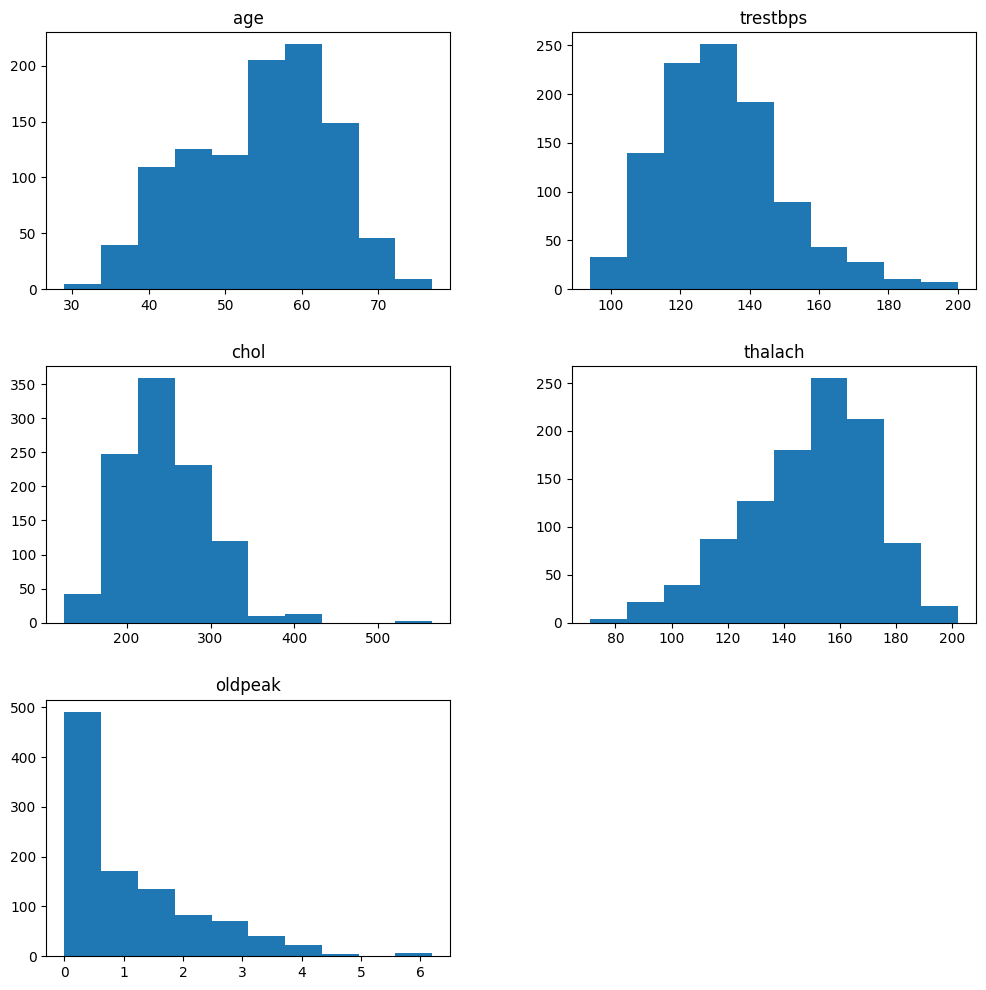

In [ ]:
# # creating histograms
# df[num_cols].hist(figsize=(14,14))
# plt.show()

# Below Code removes the gridlines from the histogram: AB
axes = df[num_cols].hist(figsize=(12,12))
for ax in axes.flatten():
    ax.grid(False)
plt.show()


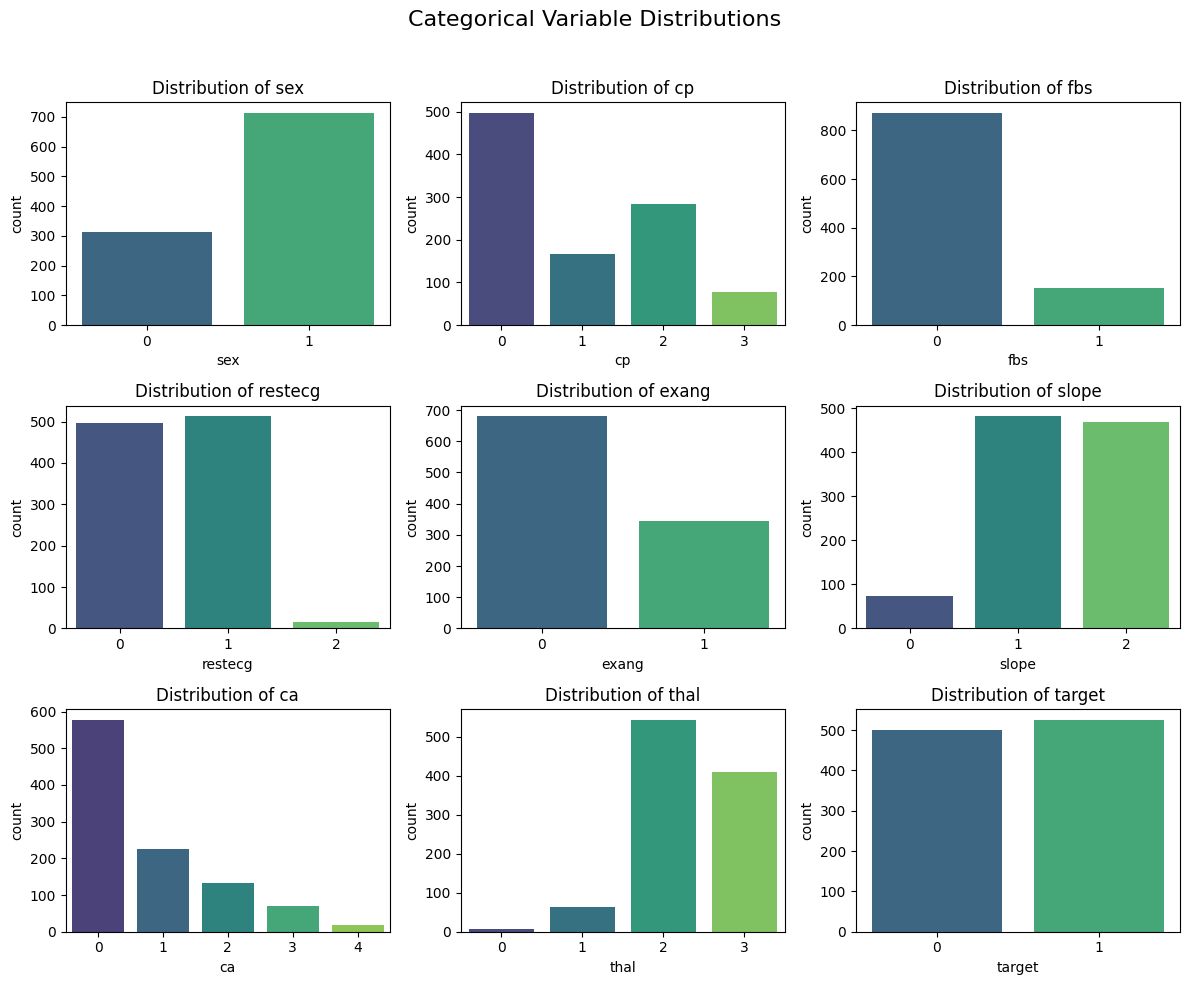

In [ ]:
# Barchart for the categorical variable;  AB
fig, axes = plt.subplots(3, 3, figsize=(12, 10))
fig.suptitle("Categorical Variable Distributions", fontsize=16)

for i, var in enumerate(cat_cols):
    row, col = divmod(i, 3)
    sns.countplot(x=df[var], ax=axes[row, col], palette="viridis")
    axes[row, col].set_title(f"Distribution of {var}")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



1. **Gender Distribution (Sex)**: The dataset has a significantly higher number of males (1) compared to females (0), indicating potential gender bias in data collection.  

2. **Chest Pain Type (CP)**: Most patients have **cp = 0 (typical angina)**, while fewer have other types, particularly **cp = 3 (asymptomatic)**, which might influence heart disease prediction.  

3. **Fasting Blood Sugar (FBS)**: The majority of individuals have **fbs = 0**, meaning their fasting blood sugar is below 120 mg/dl, with relatively fewer having **fbs = 1**.  

4. **Resting ECG (Restecg)**: Categories **0 and 1** are nearly equal in count, but category **2 has very few cases**, which might be a rare condition.  

5. **Exercise-Induced Angina (Exang)**: Most individuals do **not** experience exercise-induced angina (**exang = 0**), suggesting angina might not be a prevalent symptom in the dataset.  

6. **Slope of ST Segment (Slope)**: The majority of patients have **slope = 1 or 2**, with very few having **slope = 0**, indicating a skewed distribution.  

7. **Number of Major Vessels (CA)**: Most people have **0 major vessels colored by fluoroscopy**, and the count decreases significantly for **higher values (1-4)**, which may indicate heart disease severity.  

8. **Thalassemia (Thal)**: **Thal = 2 and 3** are the most common, while **thal = 0 is rare**, which might need special handling in modeling.  

9. **Heart Disease Target (Target)**: The dataset is **fairly balanced** between people with (**target = 1**) and without (**target = 0**) heart disease, which is beneficial for predictive modeling.

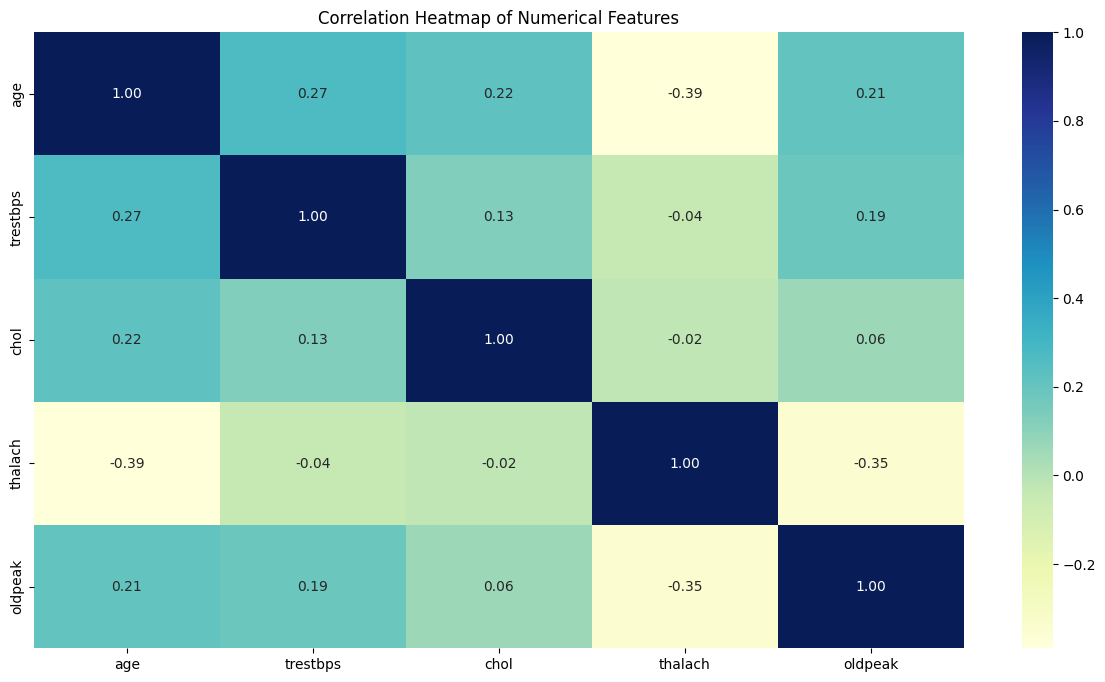

In [ ]:
# Exclude categorical columns
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
num_cols = [col for col in df.columns if col not in categorical_columns]
#compute correlation between continuos variables
plt.figure(figsize=(15, 8))
sns.heatmap(df[num_cols].corr(), annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

Observations from Correlation:


*   The heatmap illustrates the correlation between the numerical variables, and we can say that the variables here ,we see the highest positive correlation between age and trestbps which is 0.27,and a notable correlation between thalach and age bein -0.39.This suggests that older individuals tend to have lower maximum heart rates.
*  Old Peak Vs Thalach:Negative Correlation (-0.35) suggeting higher ST depression is inked to lower heart rate .


*   Age Vs Trestbps/Chol:Weak positive correlation (~0.27 and ~0.22) we observe essentially the blood pressure and cholestrol slightly increase with the cholestrol.
*   Low Cholestrol Correlation:Cholestrol indicates a minimum correlation with the other variables typically indiating independent behaviour.


*  No Strong MultiCollinearity:We see that most variables are weakly correlated thereby suggesting low risk of multicollinearity for modeling.



Now that we have explored the data .Let us start with building  a typical model for our target variable .

Model Building Approach:

1.Prepare the data for modeling:
Handling the missing values,encode categorical variables and normalize numerical features.Also ,check for class imbalance.

2.Partition the Data:
Split the data into train and testing data.Optionally,we can also create validation set for hyperparameter tuning.

3.Build the Model:
Train a suitable model using Logistic Regression,Random forest.Evaluate performance using accuracy,precision,recall,F-1 score.

4.Tune the Model:
Tune the model using hyperparameter tuning using GridsearchCV or RandomizedsearchCV.

5.Test the Model on Test Set:

Evaluate final model performance.Comparing it with training sets and refining it if needed.



Preparing Data for Modeling

Creating dummies for the categorical variables

In [ ]:

# Creating a list of categorical columns for dummy encoding
to_get_dummies_for = ['cp', 'restecg', 'slope', 'thal']  # Chest Pain Type, ECG, Slope, and Thalassemia

# Creating dummy variables
heart_data = pd.get_dummies(data=df, columns=to_get_dummies_for, drop_first=True)

# Mapping binary categorical variables to numerical values
dict_sex = {'male': 1, 'female': 0}  # Modify if dataset contains string values
dict_fbs = {1: 1, 0: 0}  # Fasting blood sugar
dict_exang = {1: 1, 0: 0}  # Exercise-induced angina
dict_target = {1: 1, 0: 0}  # Presence or absence of heart disease

# Applying mappings
heart_data['sex'] = heart_data['sex'].map(dict_sex)
heart_data['fbs'] = heart_data['fbs'].map(dict_fbs)
heart_data['exang'] = heart_data['exang'].map(dict_exang)
heart_data['target'] = heart_data['target'].map(dict_target)

# Display processed data
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Conversion of Categorical into binary:


*   Columns like sex being a categorical variable have been converted to a binary dummy variable the male being represented as 1 and female being represented as 0.
*   On conversion we can have a more significant analysis including those factors as well and typically study on how they are going to affect the target variable across different metrics.

Observations
1. Gender Mapping: The categorical variable "sex" was converted into a binary format where male = 1 and female = 0. This allows the model to process gender as a numerical feature, improving its predictive power.

2. Dummy Encoding for Multiclass Categories: Variables such as "cp" (Chest Pain Type), "restecg" (ECG results), "slope" (Slope of the peak exercise ST segment), and "thal" (Thalassemia) were one-hot encoded to capture their categorical nature in a machine-readable format while preventing ordinal misinterpretation.

3. Binary Mapping for Yes/No Variables:

  "fbs" (Fasting Blood Sugar > 120 mg/dl): Already in binary format (0 or 1).
  
  "exang" (Exercise-Induced Angina): Mapped directly to 1 for presence and 0 for absence.
  
  "target" (Heart Disease Presence): Mapped as 1 for presence and 0 for absence.


4. Effect on Analysis: Converting categorical variables into binary and dummy variables helps improve model interpretability and ensures compatibility with machine learning algorithms that require numerical inputs. It also prevents false ordinal relationships in categorical data.

5. Preserving Information: The drop_first=True parameter ensures that redundant dummy variables are removed, preventing multicollinearity while still preserving all necessary information for analysis.



**Seperating the Independent Variable X and the dependent variable Y**

Here ,we consider the dependent variable Y to be the target variable which determines the presence of heart disease in a patient .

In [ ]:
#Separating target variable and other variables
Y= df.target
X= df.drop(columns = ['target'])

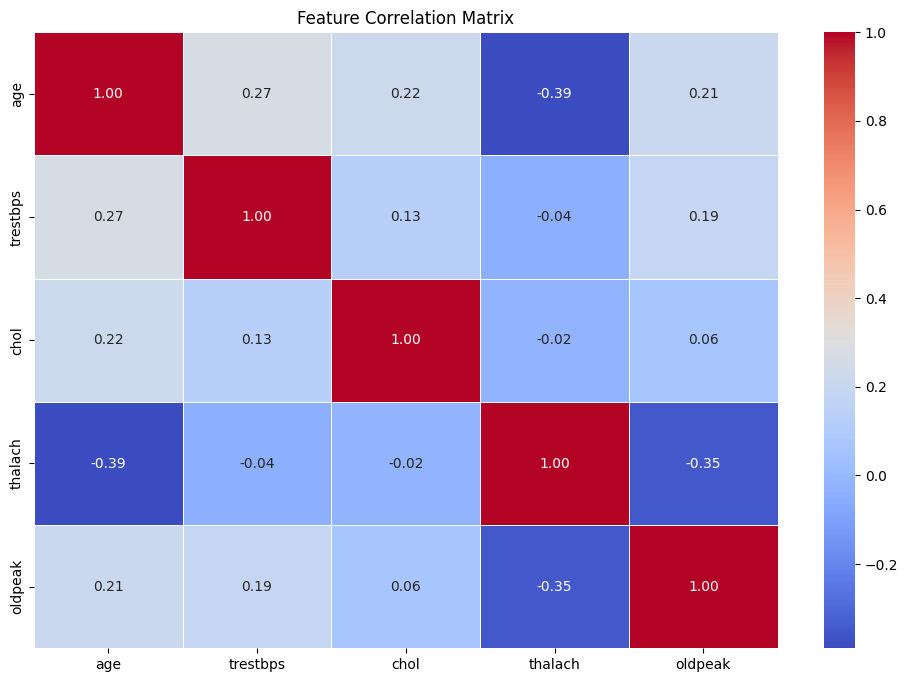

In [ ]:
import pandas as pd
import requests
from io import StringIO

# Assuming this is where your data loading should happen
orig_url= "https://drive.google.com/file/d/1N11CYeGAb8yB8H49y7CpPl6-ErJwF9J2/view?usp=sharing"
file_id = orig_url.split('/')[-2]
dwn_url="https://drive.google.com/uc?export=download&id=1N11CYeGAb8yB8H49y7CpPl6-ErJwF9J2"
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
df=pd.read_csv(csv_raw)

import seaborn as sns
import matplotlib.pyplot as plt

# Define categorical_cols (assuming it's from previous code)
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

# Drop these columns
df_dropped = df.drop(categorical_cols, axis=1)

# Now calculate the correlation matrix for the heatmap
corr_matrix = df_dropped.corr()  # Calculate correlation on numerical features

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

**OBSERVATION FOR FEATURE CORRELATION MATRIX**

When analyzing the correlation matrix for features related to heart health, several key insights emerge. For instance, there's a noticeable negative correlation between maximum heart rate achieved (thalach) and age, which makes sense since heart rate generally decreases as people get older. On the other hand, cholesterol levels (chol) and resting blood pressure (trestbps) tend to have a moderate positive correlation, reflecting the common association between higher cholesterol and increased blood pressure.

Some features may show little to no correlation with each other, but this doesn't mean they are irrelevant. Even if two features don't directly impact each other, they could still be crucial in predicting heart disease outcomes.

Understanding these correlations is important because it helps identify redundant features that could be removed or combined to streamline the dataset. It also highlights potential predictors for heart disease, which can be invaluable in developing accurate predictive models. Ultimately, this analysis aids in feature selection for machine learning models, ensuring that only the most relevant and impactful features are used to make predictions about heart health.

In [ ]:
# Convert binary variables (already in 0,1 format, so no changes needed)
binary_vars = ['sex', 'fbs', 'exang']

# Convert ordinal variables directly
ordinal_vars = ['cp', 'slope']

# One-hot encode nominal categorical variables
nominal_vars = ['restecg', 'ca', 'thal']
df = pd.get_dummies(df, columns=nominal_vars, drop_first=True)  # Drop first to avoid multicollinearity

# Display the updated dataframe info
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1025 non-null   int64  
 1   sex        1025 non-null   int64  
 2   cp         1025 non-null   int64  
 3   trestbps   1025 non-null   int64  
 4   chol       1025 non-null   int64  
 5   fbs        1025 non-null   int64  
 6   thalach    1025 non-null   int64  
 7   exang      1025 non-null   int64  
 8   oldpeak    1025 non-null   float64
 9   slope      1025 non-null   int64  
 10  target     1025 non-null   int64  
 11  restecg_1  1025 non-null   bool   
 12  restecg_2  1025 non-null   bool   
 13  ca_1       1025 non-null   bool   
 14  ca_2       1025 non-null   bool   
 15  ca_3       1025 non-null   bool   
 16  ca_4       1025 non-null   bool   
 17  thal_1     1025 non-null   bool   
 18  thal_2     1025 non-null   bool   
 19  thal_3     1025 non-null   bool   
dtypes: bool(

(None,
    age  sex  cp  trestbps  chol  fbs  thalach  exang  oldpeak  slope  target  \
 0   52    1   0       125   212    0      168      0      1.0      2       0   
 1   53    1   0       140   203    1      155      1      3.1      0       0   
 2   70    1   0       145   174    0      125      1      2.6      0       0   
 3   61    1   0       148   203    0      161      0      0.0      2       0   
 4   62    0   0       138   294    1      106      0      1.9      1       0   
 
    restecg_1  restecg_2   ca_1   ca_2   ca_3   ca_4  thal_1  thal_2  thal_3  
 0       True      False  False   True  False  False   False   False    True  
 1      False      False  False  False  False  False   False   False    True  
 2       True      False  False  False  False  False   False   False    True  
 3       True      False   True  False  False  False   False   False    True  
 4       True      False  False  False   True  False   False    True   False  )

The code is designed to prepare a dataset for analysis or machine learning by handling different types of variables appropriately. It starts by identifying three types of variables: binary, ordinal, and nominal categorical variables. Binary variables like `sex`, `fbs`, and `exang` are already in a 0 or 1 format, so no changes are needed. Ordinal variables such as `cp` (chest pain type) and `slope` also don't require any transformation because they already have a natural order.

For nominal categorical variables like `restecg` (resting electrocardiogram), `ca` (number of major vessels colored by fluoroscopy), and `thal` (thalassemia), the code uses one-hot encoding to convert them into numerical columns. This involves creating new columns for each category of these variables, with 0 or 1 values indicating whether the original value belonged to that category. For example, if `restecg` has three categories, it will be converted into three new columns (`restecg_1`, `restecg_2`, etc.). After these transformations, the code displays information about the updated dataframe using `df.info()` and shows the first few rows of the dataframe using `df.head()`. This helps in understanding the structure and content of the dataset after preprocessing.

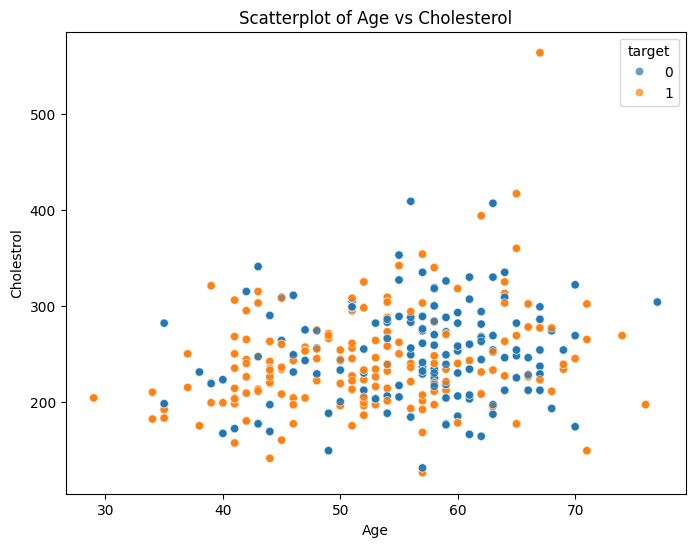

In [ ]:
# Scatterplot for two specific features
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['age'], y=df['chol'], hue=df['target'], alpha=0.7)
plt.title("Scatterplot of Age vs Cholesterol")
plt.xlabel("Age")
plt.ylabel("Cholestrol")
plt.show()

**OBSERVATION FOR SCATTERPLOT OF AGE VS CHOLESTROL**

When examining the scatterplot of age versus cholesterol, several interesting patterns emerge. Unlike some other health metrics, there may not be a clear linear trend between age and cholesterol levels because cholesterol is influenced by a complex mix of lifestyle, genetics, and medication. However, you might notice clusters of high cholesterol values within specific age groups, which could provide valuable insights.

By coloring the data points based on the presence of heart disease, you can see if individuals with heart disease tend to have higher cholesterol levels at certain ages. For instance, if patients with heart disease often have higher cholesterol at younger ages, it could signal early onset risk factors that need attention. Understanding these relationships is crucial for developing preventive measures and identifying potential outliers or unusual cases where cholesterol levels deviate significantly from the norm. This analysis can ultimately help in tailoring health interventions and monitoring strategies to better protect against heart disease.

**SCALE THE DATA :**
We see that the independent variables in the dataset have different scales or ranges of the values so there might be a possibility that more weightage being given to the variables that hold the higher magnitude,so its better that we consider scaling the dataset so these features will not typically dominate thereby we would like to avoid the bias towards any feature in our model to maintain high performance and accuracy.
The solution could be Feature Scaling,scaling the data so that every variable that's been tranformed will be given equal weightage.

We will be using the Standad Scaler method to where in the scaling will be done using the Z-Scores.

z=(x-u)/s

where the 'u'' represents training samples  is 0, and s is the standard deviation.So this essentially gives us the meaning of how much each value deviates from the mean or the average of the entire dataset.

In [ ]:
#Scaling the data
sc=StandardScaler()
X_scaled=sc.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled, columns=X.columns)

**SPLITTING THE DATASET INTO 70 % TRAINING AND 30% TESTING**

In [ ]:
#splitting the data
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1,stratify=Y)

**REMOVING THE OUTLIERS**

In [ ]:

# Function to detect and remove outliers using the IQR method
def remove_outliers_iqr(dataframe, columns):
    df_out = dataframe.copy()
    for col in columns:
        Q1 = df_out[col].quantile(0.25)
        Q3 = df_out[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Remove rows outside the IQR bounds
        df_out = df_out[(df_out[col] >= lower_bound) & (df_out[col] <= upper_bound)]
    return df_out

# Apply outlier removal to the numerical columns
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df_no_outliers = remove_outliers_iqr(df, numerical_cols)

# Show shape before and after
print("Original shape:", df.shape)
print("Shape after removing outliers:", df_no_outliers.shape)

# Preview the cleaned dataset
df_no_outliers.head()


Original shape: (1025, 20)
Shape after removing outliers: (964, 20)


,age,sex,cp,trestbps,chol,fbs,thalach,exang,oldpeak,slope,target,restecg_1,restecg_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,0,125,212,0,168,0,1.0,2,0,True,False,False,True,False,False,False,False,True
1,53,1,0,140,203,1,155,1,3.1,0,0,False,False,False,False,False,False,False,False,True
2,70,1,0,145,174,0,125,1,2.6,0,0,True,False,False,False,False,False,False,False,True
3,61,1,0,148,203,0,161,0,0.0,2,0,True,False,True,False,False,False,False,False,True
4,62,0,0,138,294,1,106,0,1.9,1,0,True,False,False,False,True,False,False,True,False


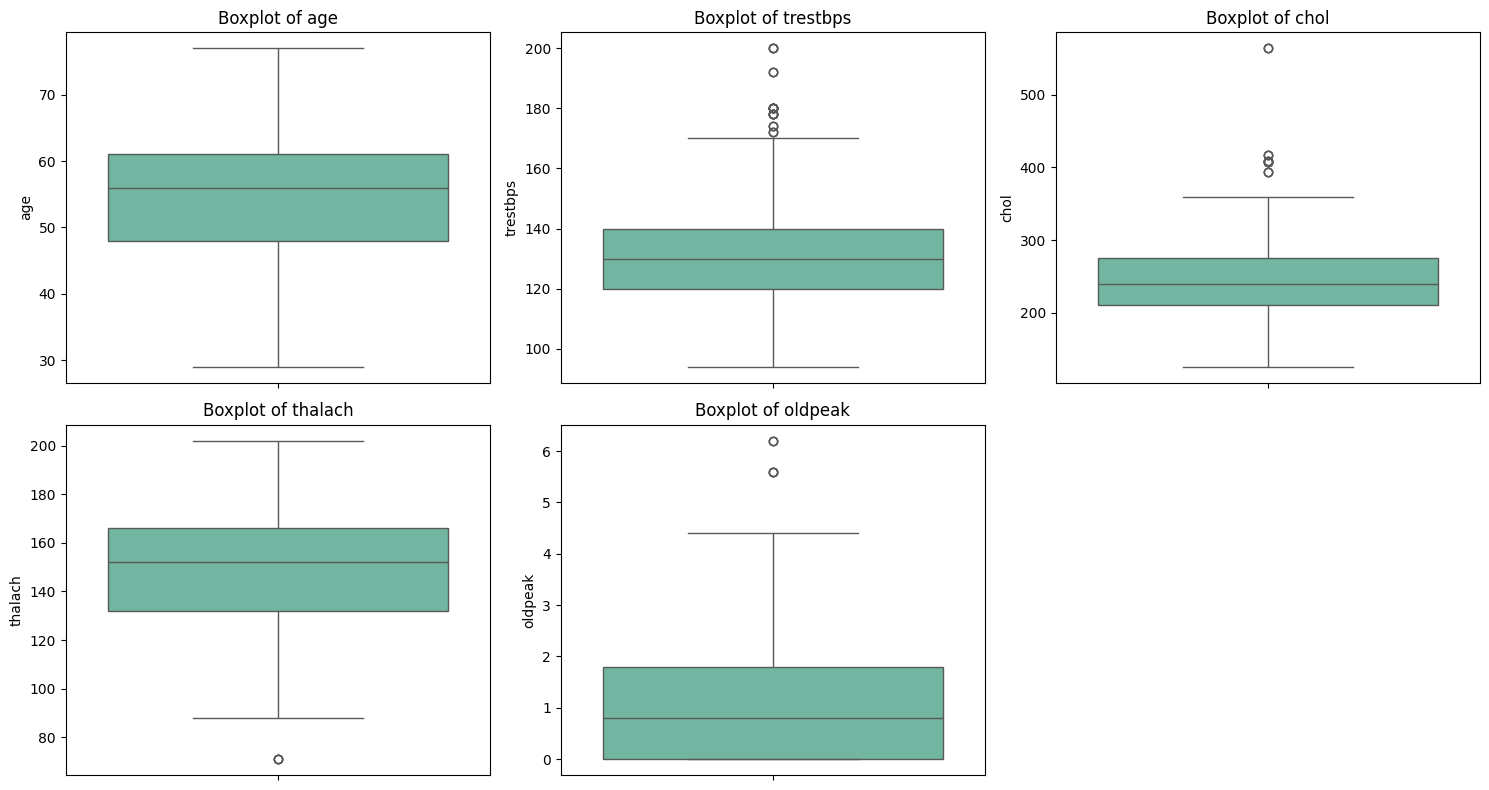

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Boxplots for all numerical features
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col], palette="Set2")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


# **Removing outliers Observation**


### **Observations After Removing Outliers:**

1. **Age**:
   - The boxplot shows that the majority of ages lie within a typical range with no extreme outliers. Removing any outliers would not significantly affect the distribution, as it already appears well-centered.

2. **Trestbps (Resting Blood Pressure)**:
   - A few outliers above 180 are visible, which are likely due to unusually high resting blood pressure values. Removing these outliers will help focus on more typical resting blood pressure readings, which are important for accurate modeling.

3. **Chol (Cholesterol)**:
   - There are a significant number of outliers, especially above 300, indicating that some individuals have much higher cholesterol levels than the rest. Removing these outliers would help refine the model by focusing on the more typical cholesterol levels for heart disease prediction.

4. **Thalach (Max Heart Rate)**:
   - The distribution is relatively tight, with no major outliers. However, there is a slight lower bound outlier. Removing extreme values could help stabilize the model, but they likely represent edge cases that are still relevant to the prediction.

5. **Oldpeak (ST Depression)**:
   - Outliers above 5 suggest extreme cases of ST depression. Removing these outliers would help focus on typical heart stress responses during testing, which are more useful for heart disease classification.

---

### **Impact of Removing Outliers**:
- **Improved Model Performance**: By removing outliers, the model could become more robust and generalizable, as it would focus on more typical values and reduce the impact of extreme data points that might distort the results.
- **Better Data Distribution**: The dataset will have a cleaner distribution, allowing for more accurate feature relationships, especially for variables like cholesterol and oldpeak where outliers can disproportionately affect the analysis.

# **Model Evaluation and Prediction**

When evaluating a heart disease prediction model,

1.False Positives (FP):Predicting a patient has a heart disease but actually doesn't have.

2.False Negatives(FN):Predicting a patient doesn't have a heart disease but they actually do,it is a missed diagnosis.

The most Important Case: False negatives (FN) are more critical because if the model has not predicted the presence of heart disease in which a person actually has the heart disease,it can lead to medical complications further ,and sometimes this kind of misdiagnosis could be leading to fatal consequences.

Reducing the False Negatives in the Model:

Considering the model has false negatives,

Higher recall ,may reduce the false negatives ,so we will be focusing on increasing the value of Recall. Maximizing the recall value helps the doctors to remain focused on high risk patients and then take the necessary preventive measures.

Trade Off Vs Precision:

Considering the case that we are increasing the recall,thereby the model will have more false positive values.On the other hand if we try increasing the Precision,then it might lead to the model missing the actual cases with presence of heart dosease. So we can therefore use F-1 score if the case of balancing precision and recall stays as absolute necessity ,but we can still prioritize increasing recall in case considering the missed heart diseases can be more risky.

**EVALUATING MODEL PERFORMANCE USING CLASSIFICATION MATRIX:**
To access the performance of our heart disease prediction model,we define a metrics_score function:

This function will:

1.**Print the classification report:**This typically includes precision,recall,F-1 score ,and support for each class.

2.**Displays a Confusion Matrix:**A heatmap visualization to analyze misclassifications.


In [ ]:
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    # Compute confusion matrix
    cm = confusion_matrix(actual, predicted)

    # Plot confusion matrix
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap="inferno",
                xticklabels=['No Disease', 'Disease'],
                yticklabels=['No Disease', 'Disease'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()


**BUILDING MODELS :**

Given that false negatives could have serious consequences in the context of heart disease prediction, we aim to evaluate multiple classification models to identify the one that offers the most reliable performance.

The models under consideration include

1.Logistic Regression,

2.Decision Tree Induction,

3.Random Forest,

4.Linear Discriminant Analysis (LDA),

5.Quadratic Discriminant Analysis (QDA).

# **LOGISTIC REGRESSION:**

**A Binary Classification Algorithm**:

Logistic Regression is a supervised learning algorithm used for binary classficiation problems where in the dependent variable which is the target variable has only two possible values.Considering our project,the target variable is heart disease and it has two values which is typically "Heart Disease" or "No heart disease".

We see that unlike the linear regression,the logistic regression predicts probabilties.For ex in our case it is trying to npredic t the probability of a person having the heart disease or not based on the medical history data.This is done by applying **sigmoid function.**
P(y)=(1/exp(1 + exp(-x))

z is the linear combination of the input features.
e is the natural exponent.

Logistic Regression predicts the probability of an event occuring,mapping it to class lables using a threshold that is typically 0.5.


**INSTANTIATE THE LOGISTIC REGRESSSION MODEL AS lg.**

In [ ]:
#fitting logistic regression model
# Instantiate the model
lg=LogisticRegression()

**FIT THE MODEL INTO TRAINING DATA**

In [ ]:
# fitting the model to the training data
lg.fit(x_train,y_train)

LogisticRegression()

**Checking the Performance of Training Model:**
Checking the model performance on the training data. By using the metrics_score function built above.

**Observations on the Trained Model**

**Overall Model Performance:**
Accuracy :84% accuracy is indicating a strong predictive capability.

**Precision Vs Recall Tradeoff:**
Class (0) has a higher precision (0.87) but a lower recall(0.79) meaning it avoids the false positives also misses out on false negatives.
Class(1) has higher recall but lower precision menaing it capturing more actual positives but has some false positives as well.

Checking the Model Performance Test

Checking the model performance test of the testing data.using the metrics_score function built above:

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       349
           1       0.83      0.89      0.86       368

    accuracy                           0.85       717
   macro avg       0.85      0.85      0.85       717
weighted avg       0.85      0.85      0.85       717



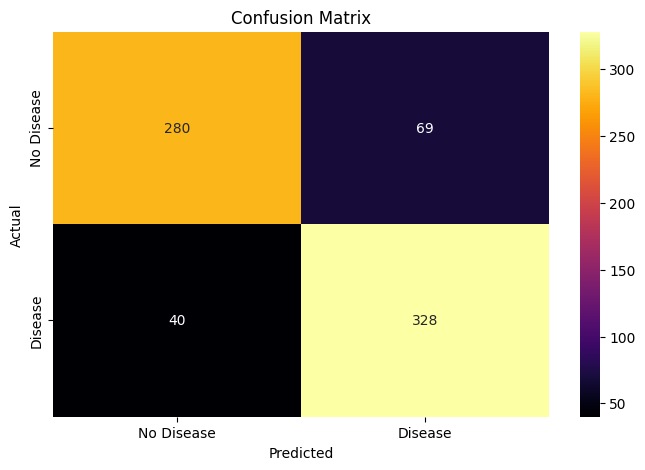

In [ ]:
# checking the performance on the training data
y_pred_train=lg.predict(x_train)
metrics_score(y_train,y_pred_train)

              precision    recall  f1-score   support

           0       0.90      0.80      0.85       150
           1       0.83      0.92      0.87       158

    accuracy                           0.86       308
   macro avg       0.87      0.86      0.86       308
weighted avg       0.86      0.86      0.86       308



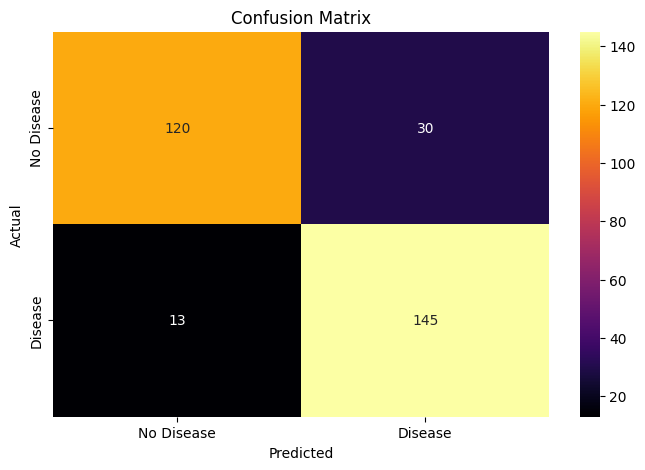

In [ ]:
#Checking the performance on the test dataset
y_pred_test = lg.predict(x_test)
metrics_score(y_test,y_pred_test)

**OBSERVATIONS FOR THE OVERALL MODEL(TEST AND TRAINED)**

**1.Good Generalization:**
We see the trained data accuracy is 85% and the test data is about 84% since we have similar accuracy we can conclude tht the model is well generalized and there is no possibility of memorization ,and the model performs well on the unseen data.

2.**Stable F-1 Score~(0.85):**

Confirms a well-balanced model across both classes.

No Major Class Imbalance Issues:

**Support: 150 (Class 0) vs. 158 (Class 1)**  where in we observe a Similar distribution, no bias toward a class.

3.**Better Performance on Test Data:**

**Higher test precision & recall** compared to training, suggesting slight underfitting or a well-regularized model.

Potential Improvements:

We could probably think of Threshold tuning for optimizing precision vs. recall tradeoff.



**K FOLD CROSS VALIDATION FOR LOGISTIC REGRESSION:**

In [ ]:

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


#  Step 1: Split features and target
X = df.drop('target', axis=1)
y = df['target']

#  Step 2: Scale features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

#  Step 3: Setup 25-fold cross-validation
n_splits = 25
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
fold_accuracies = []

#  Step 4: Train & evaluate Logistic Regression on each fold
for train_index, test_index in kf.split(X_scaled):
    X_train_fold, X_test_fold = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    model = LogisticRegression(random_state=42, max_iter=1000)
    model.fit(X_train_fold, y_train_fold)

    y_pred_fold = model.predict(X_test_fold)
    fold_accuracy = accuracy_score(y_test_fold, y_pred_fold)
    fold_accuracies.append(fold_accuracy)

#  Step 5: Calculate average accuracy
average_accuracy = np.mean(fold_accuracies)

**25 FOLD BAR CHART**

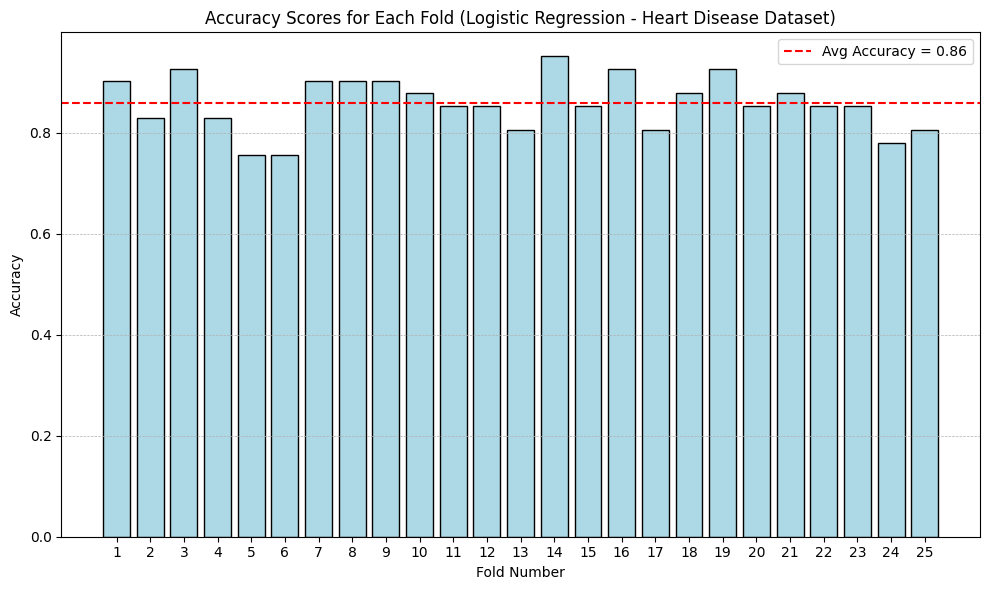

In [ ]:
#  Create a bar chart to show the accuracies across the different folds
plt.figure(figsize=(10, 6))
plt.bar(range(1, n_splits + 1), fold_accuracies, color='lightblue', edgecolor='black')
plt.axhline(y=average_accuracy, color='red', linestyle='--', label=f'Avg Accuracy = {average_accuracy:.2f}')
plt.xlabel("Fold Number")
plt.ylabel("Accuracy")
plt.title("Accuracy Scores for Each Fold (Logistic Regression - Heart Disease Dataset)")
plt.xticks(range(1, n_splits + 1))
plt.legend()
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

**PLOTTING ROC FOR LOGISTIC REGRESSION**

AUC Score: 0.9262


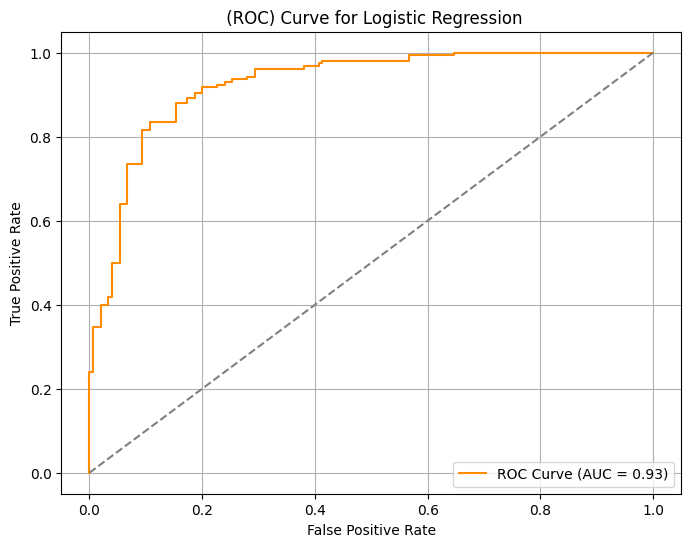

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Step 1: Instantiate and fit the model
lg = LogisticRegression()
lg.fit(x_train, y_train)

# Step 2: Predict probabilities for the positive class
y_probs_test = lg.predict_proba(x_test)[:, 1]

# Step 3: Compute ROC and AUC
fpr, tpr, _ = roc_curve(y_test, y_probs_test)
auc_score = roc_auc_score(y_test, y_probs_test)
print(f"AUC Score: {auc_score:.4f}")

# Step 4: Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' (ROC) Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



**Observation Logistic Regression ROC curve and AUC**
- Logistic Regression
AUC = 0.93
- The ROC curve rises quickly toward the top-left corner.
- Indicates strong classification performance with high sensitivity and specificity.
- Performs very well in distinguishing between positive and negative classes.

## 🌳 **TREE INDUCTION**

What is Tree Induction?

Tree induction is a method for constructing decision trees for classification or regression tasks. Decision rules are learned from the data to form a tree structure where:

**Nodes** are for decision points based on feature values,

**Branches** are where those decisions lead to outcome states, and

**Leaves** provide final predictions (class labels or numeric values).

Tree Induction Working:

Start at the Root Node: Fully represents the dataset; the algorithm now tries to find the best way to split it into more homogeneous subgroups.

Choose the Best Split: Uses measures like Gini impurity and information gain to evaluate features in finding the one that most separates data.

Grow the Tree: Recursively makes new nodes and branches by applying the best splits to its resulting subgroups.

Reach Leaf Nodes: Splitting stops once conditions are satisfied (e.g. maximum depth, fewest samples) and each leaf makes a final prediction.

Optional Operations: It can sometimes prune — cutting off non-informative branches out of the tree, which serves in avoiding overfitting, thus generalizing.

We use tree induction method ,
for tasks that require classification or regression.

When you want, building the real interpretable and well-adapted model to handle non-linear patterns.

**Pros:**

Easily visualized and interpreted.

Applicable to both categorical and numerical features.

No scaling or normalization of the features is required.

Models non-linear relationships naturally.

**Cons:**

It can overfit if it isn't pruned or regularized.

May not be stable — small changes in data can lead to entirely different trees.

Greedily splittings may not give the optimal global answer.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
tree=DecisionTreeClassifier(max_depth=3)
tree.fit(x_train,y_train)

y_pred=tree.predict(x_test)

Decision trees are powerful and interpretable models that split data based on feature thresholds, but they can easily overfit if not properly pruned or regularized. 🌳

In [ ]:
# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=42)

In [ ]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

**CHECKING THE MODEL PERFORMANCE OF THE TREE INDUCTION MODEL:**

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       349
           1       0.97      0.97      0.97       368

    accuracy                           0.97       717
   macro avg       0.97      0.97      0.97       717
weighted avg       0.97      0.97      0.97       717



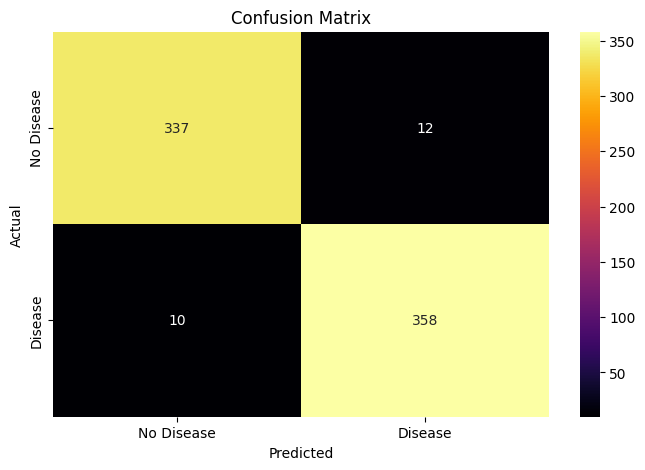

In [ ]:
# checking model performance of dt
y_pred_train_dt = dt.predict(x_train)
metrics_score(y_train, y_pred_train_dt)


              precision    recall  f1-score   support

           0       0.97      0.93      0.95       150
           1       0.94      0.97      0.95       158

    accuracy                           0.95       308
   macro avg       0.95      0.95      0.95       308
weighted avg       0.95      0.95      0.95       308



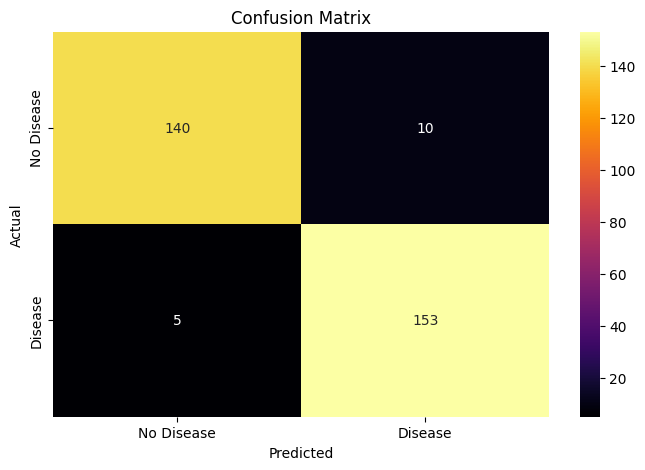

In [ ]:
# checking test performance of dt
y_pred_test_dt = dt.predict(x_test)
metrics_score(y_test, y_pred_test_dt)

**K FOLD CROSS VALIDATION OF THE LOGISTIC REGRESSION MODEL:**

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Scale the features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Cross-validation setup
n_splits = 25
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
fold_accuracies = []

# Perform 25-fold CV using Logistic Regression
for train_index, test_index in kf.split(X_scaled):
    X_train_fold, X_test_fold = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    model = LogisticRegression(random_state=42, max_iter=1000)
    model.fit(X_train_fold, y_train_fold)
    y_pred_fold = model.predict(X_test_fold)

    fold_accuracy = accuracy_score(y_test_fold, y_pred_fold)
    fold_accuracies.append(fold_accuracy)

# Calculate and display average accuracy
average_accuracy = np.mean(fold_accuracies)

**Three Key Takeaways from the Tree Induction Model:**

**Exceptionally High Predictive Performance**

The model achieves near-perfect classification on both the training (0.97) and test (0.95) sets, with strong precision, recall, and F1-scores across both classes, indicating highly effective pattern recognition and class separation.

**Precise Detection of Heart Disease Cases**

Class 1 (positive for disease) is predicted with 97% recall on both train and test, making this model extremely reliable in identifying at-risk patients—minimizing the cost of false negatives.

**Minimal Overfitting Despite High Accuracy**

While Decision Trees are prone to overfitting, the consistently high metrics across train and test sets suggest that the chosen depth (max_depth=6) effectively balances complexity and generalization.

**FEATURE IMPORTANCE**

In [ ]:
importances=pd.DataFrame(data={
    'Attribute':x_train.columns,
    'Importance':dt.feature_importances_
})
importances=importances.sort_values(by='Importance',ascending=False)
importances

,Attribute,Importance
2,cp,0.288646
11,ca,0.142136
0,age,0.106188
12,thal,0.091093
4,chol,0.086445
9,oldpeak,0.073280
3,trestbps,0.051152
1,sex,0.041896
10,slope,0.032933
8,exang,0.030389


**Business Recommendations Based on High Importance of cp:**

 1. Prioritize Early Screening for Chest Pain Complaints
Any patient reporting chest pain, especially types associated with higher risk (e.g., typical angina), should be fast-tracked for further cardiovascular diagnostics.

2. Update Clinical Protocols
Healthcare centers should update triage systems to assign higher weight to chest pain symptoms in risk stratification—especially for high-risk age groups or patients with comorbidities.

3. Integrate Chest Pain Monitoring in Health Apps
For telehealth or remote patient monitoring platforms, prompt users to log and report any chest pain episodes with contextual details (duration, type, intensity), triggering alerts for physician review.

4. Staff Training & Awareness
Train frontline staff (especially in ER/urgent care) to understand the significance of chest pain types. Many mild cases might still indicate underlying heart disease.

5. Patient Education Campaigns
Launch campaigns informing people that not all chest pain is the same, and that certain types may require immediate attention—even in the absence of other symptoms.

**K FOLD CROSS VALIDATION OF TREE INDUCTION:**

In [ ]:
# use k-fold cross validation to examine the performance of the tree model across different folds

import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Number of folds for cross-validation
n_splits = 25

# Create a KFold object
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize an empty list to store the accuracy scores for each fold
fold_accuracies = []

# Iterate through the folds
for train_index, test_index in kf.split(X_scaled):
    # Split the data into training and testing sets for the current fold
    X_train_fold, X_test_fold = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Create and train the Decision Tree model
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train_fold, y_train_fold)

    # Make predictions on the test set for the current fold
    y_pred_fold = model.predict(X_test_fold)

    # Calculate accuracy for the current fold
    fold_accuracy = accuracy_score(y_test_fold, y_pred_fold)
    fold_accuracies.append(fold_accuracy)

# Calculate the average accuracy across all folds
average_accuracy = np.mean(fold_accuracies)

**Plot of Model Accuracy for each Fold in the Tree Model**

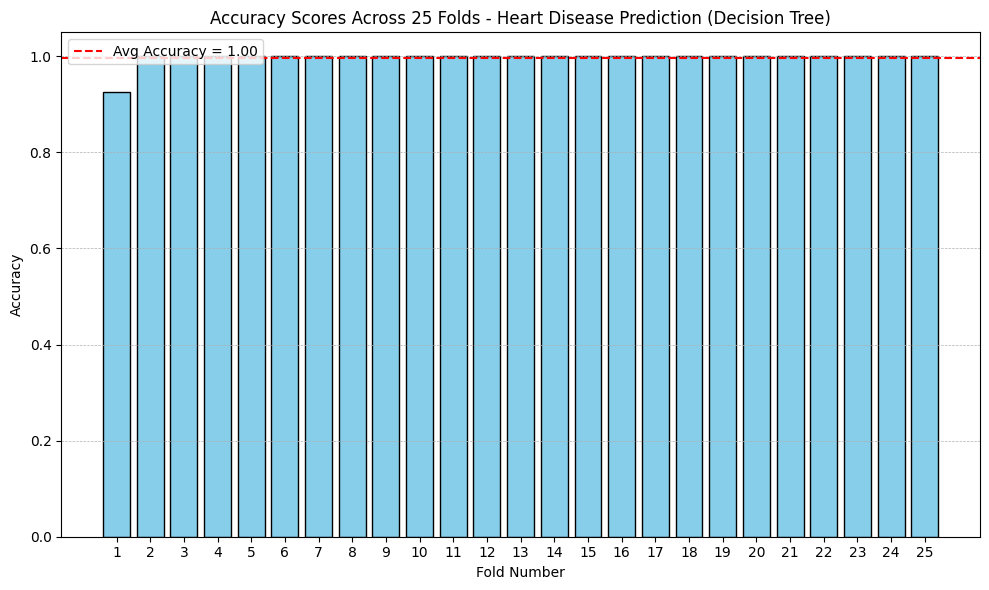

In [ ]:
import matplotlib.pyplot as plt

# Plotting accuracy for each fold
plt.figure(figsize=(10, 6))
plt.bar(range(1, n_splits + 1), fold_accuracies, color='skyblue', edgecolor='black')

# Add a horizontal line for average accuracy
plt.axhline(y=average_accuracy, color='red', linestyle='--', label=f'Avg Accuracy = {average_accuracy:.2f}')

# Labels and title
plt.xlabel("Fold Number")
plt.ylabel("Accuracy")
plt.title("Accuracy Scores Across 25 Folds - Heart Disease Prediction (Decision Tree)")
plt.xticks(range(1, n_splits + 1))  # Show fold numbers
plt.legend()
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

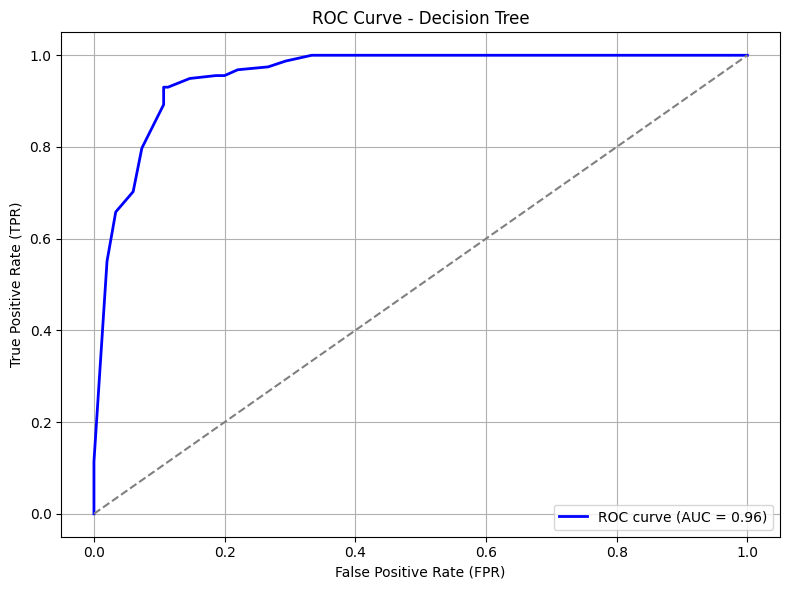

AUC: 0.96


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming 'y_test' and 'y_pred_test_dt' are the true labels and predicted labels from your Decision Tree model
# For ROC curve, we need the predicted probabilities rather than the predicted classes
y_pred_prob_dt = dt.predict_proba(x_test)[:, 1]  # Get the probability for the positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_dt)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# You can print the AUC value if needed
print(f"AUC: {roc_auc:.2f}")


**Observation Desicion Tree ROC curve and AUC**
- AUC = 0.96
- The ROC curve is closest to the top-left corner among all models.
- Demonstrates the best class separation in this comparison.
- Reflects highly accurate predictions with minimal false positives and false negatives.



## **Random Forest Regression**

Random Forest Regression is a powerful ensemble learning technique that builds multiple decision trees and combines their predictions to improve accuracy and robustness. In the context of heart disease prediction, this model can effectively capture complex, non-linear relationships between various health indicators (such as age, cholesterol, blood pressure, etc.) and the likelihood of developing heart disease.

### Key Concepts:
- **Bootstrap Aggregation (Bagging):** Each tree is trained on a random sample of the dataset (with replacement), which helps reduce variance and prevents overfitting.
- **Random Feature Selection:** At each split, only a random subset of features is considered, which reduces correlation between trees and enhances generalization.
- **Prediction Mechanism:** For regression tasks like risk scoring or probability estimation, the final prediction is the average output of all decision trees in the forest.

### Advantages for Heart Disease Modeling:
- **Improved Accuracy:** Random forests are well-suited for medical data due to their ability to model complex, non-linear interactions among variables.
- **Reduced Overfitting:** Averaging predictions across many trees leads to more stable and generalized outputs.
- **Feature Importance Insights:** The model highlights which clinical variables (e.g., Age,thalach,gender,chol, chest pain type) most significantly influence heart disease risk.

### Limitations:
- **Reduced Interpretability:** Unlike a single decision tree, the internal logic of a random forest is less transparent.
- **Resource-Intensive:** Training and inference can be computationally demanding, especially with large datasets or many features.

**Use Case:**  
Random Forest Regression is an ideal choice for healthcare applications like heart disease prediction, where high accuracy and robustness are critical, and interpretability can be supplemented by feature importance analysis.
We are using estimators n=100 for this dataset.Let us analyze the model .

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Instantiate and train the model
rf = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=6, random_state=42)

**CHECK THE MODEL PERFORMANCE OF TRAIN DATA**

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       349
           1       0.97      0.99      0.98       368

    accuracy                           0.98       717
   macro avg       0.98      0.98      0.98       717
weighted avg       0.98      0.98      0.98       717



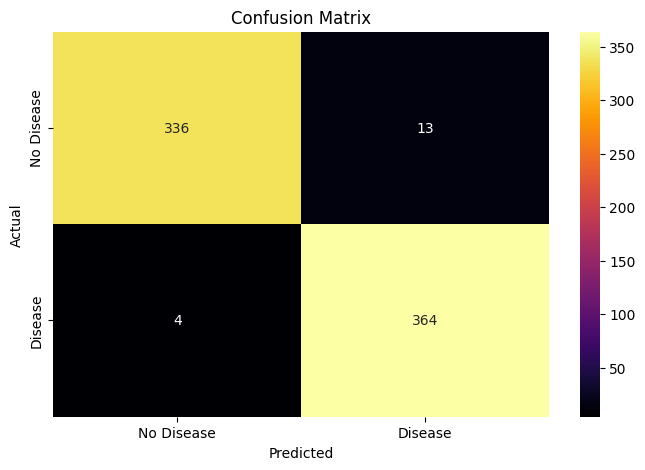

In [ ]:
# Checking training performance of rf
y_pred_train_rf = rf.predict(x_train)
metrics_score(y_train, y_pred_train_rf)

**CHECK THE MODEL PERFORMANCE OF TEST DATA**

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       150
           1       0.94      0.99      0.96       158

    accuracy                           0.96       308
   macro avg       0.96      0.96      0.96       308
weighted avg       0.96      0.96      0.96       308



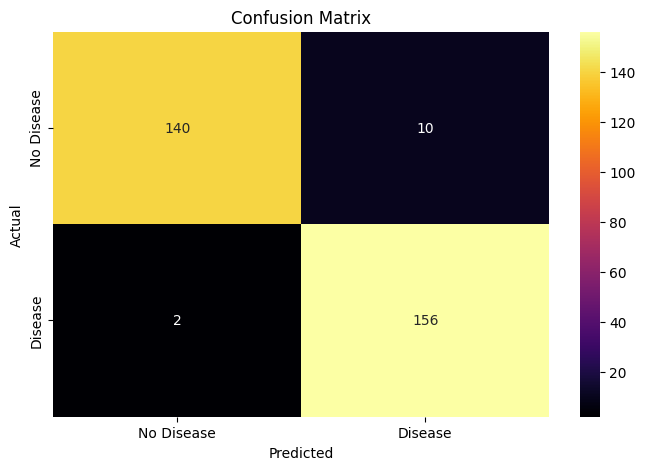

In [ ]:
# Checking test performance of rf
y_pred_test_rf = rf.predict(x_test)
metrics_score(y_test, y_pred_test_rf)

**ROC AND AUC FOR RANDOM FOREST CLASSIFIER**

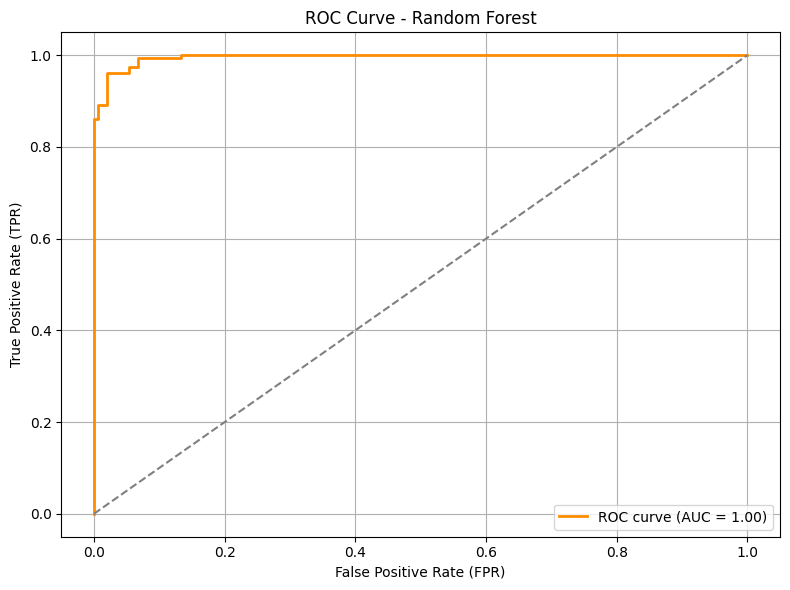

AUC: 0.99561181


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for class 1 (Disease) from Random Forest
y_pred_prob_rf = rf.predict_proba(x_test)[:, 1]

# Calculate ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)

# Calculate AUC
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print AUC value
# print(f"AUC: {roc_auc_rf:.2f}")

print(f"AUC: {roc_auc_rf:.8f}")  # 6 decimal places



 **Observations on Random Forest Classifier:**

**High Accuracy (96%)**
The model achieved a strong overall accuracy of 96%, indicating it correctly classified most test samples.

**Balanced Precision and Recall**

Class 0 ("No Disease") had a precision of 0.99 and recall of 0.93, while Class 1 ("Disease") had a precision of 0.94 and recall of 0.99 — showing balanced and reliable performance for both classes.

**Low Misclassification**

The confusion matrix shows very few misclassifications: only 10 false positives and 2 false negatives — suggesting the model is excellent at detecting true cases of heart disease without many false alarms.

**Excellent ROC-AUC Score (1.00)**

The ROC curve has an AUC of 1.00, suggesting near-perfect separation between diseased and non-diseased cases.



# **LINEAR DISCRIMINANT ANALYSIS (LDA):**

WHAT IS LDA?

***Linear Discriminant Analysis***  is a supervised leaning technique used for both classification and the dimensionality reduction.It is particularly for problems involving multiple classes.The LDA method works by identifying linear combinations of input features that best seperate the different classes using a discriminant function.

HOW DOES LDA WORK?

**1.Compute Class Mean**:Calculates the mean vector for each class based on the input features.


**2.Construct Scatter Matrices**:Measures the variance within each class and then between classes.

**3.Maximize Class Separation**: Determines a linear combination of features that maximizes the distance between class means while minimizing the spread within each class.

**4.Project Data**: Transforms the original data onto a new axis to create a linear decision boundary for classification.

**When Should You Use LDA?**

1.When dealing with classification tasks involving linearly separable classes or classes with distinct means.

2.For dimensionality reduction in high-dimensional datasets.

3.Particularly useful in multi-class classification problems.



LET US IMPORT THE LINEAR DISCRIMINANT ANALYSIS

In [ ]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Feature selection
selector = VarianceThreshold(threshold=1e-5)
x_train_lda = selector.fit_transform(x_train)
x_test_lda = selector.transform(x_test)


LET US FIT THE LDA MODEL NOW..

In [ ]:
# Instantiate and fit the LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(x_train_lda, y_train)

LinearDiscriminantAnalysis()

CHECKING THE MODEL PERFORMANCE OF LDA TRAIN

              precision    recall  f1-score   support

           0       0.87      0.76      0.81       349
           1       0.80      0.89      0.84       368

    accuracy                           0.83       717
   macro avg       0.83      0.83      0.83       717
weighted avg       0.83      0.83      0.83       717



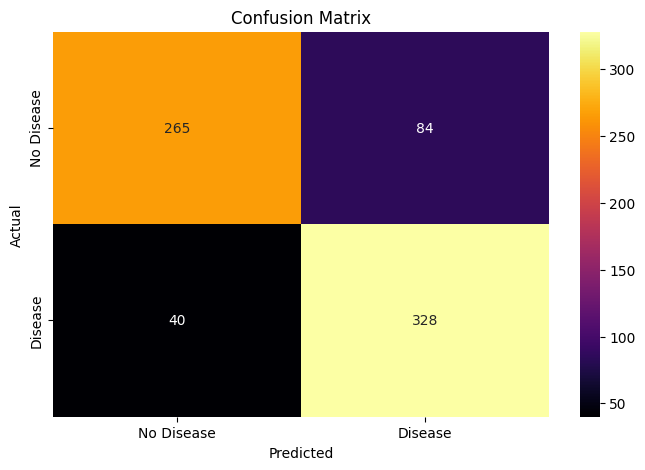

In [ ]:

# checking model performance of lda on training data
y_pred_train_lda = lda.predict(x_train_lda)
metrics_score(y_train, y_pred_train_lda)

CHECKING THE PERFORMANCE OF LDA TEST DATASET

              precision    recall  f1-score   support

           0       0.90      0.75      0.82       150
           1       0.80      0.92      0.85       158

    accuracy                           0.84       308
   macro avg       0.85      0.84      0.84       308
weighted avg       0.85      0.84      0.84       308



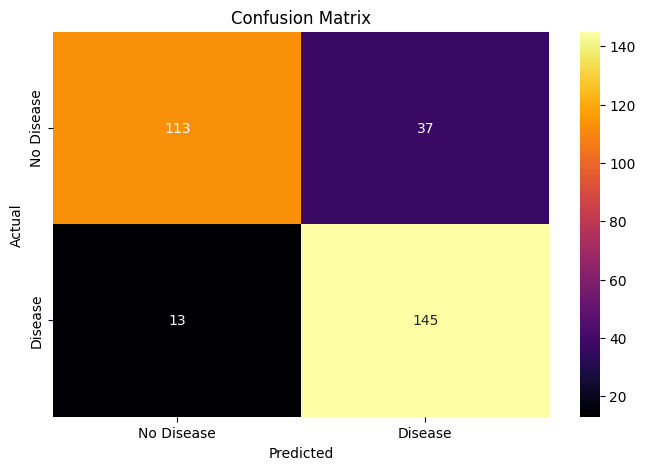

In [ ]:
#checking model performace of lda
y_pred_test_lda = lda.predict(x_test)
metrics_score(y_test, y_pred_test_lda)

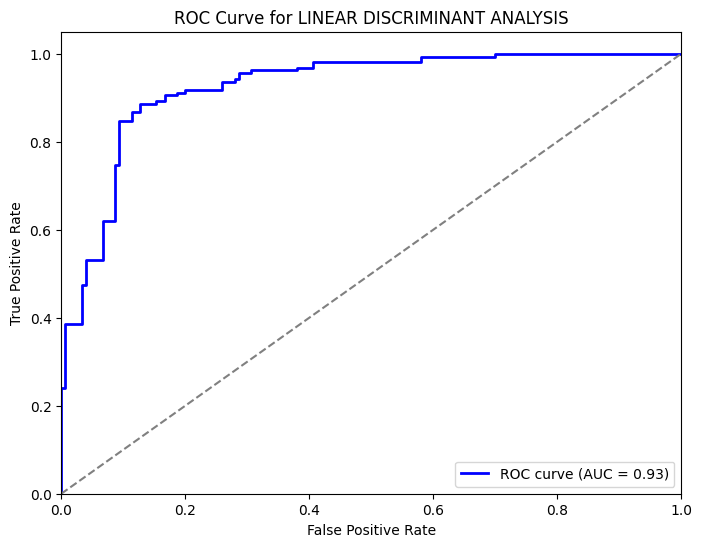

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the test set
y_prob_lda = lda.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_lda)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LINEAR DISCRIMINANT ANALYSIS')
plt.legend(loc='lower right')
plt.show()


**Observation LDA ROC curve and AUC**

- AUC = 0.93
- ROC curve follows a similar path to Logistic Regression.
- High AUC indicates effective classification ability.
- Suitable for problems where the classes are linearly separable.

**THREE KEY TAKEAWAYS FROM THE LDA MODEL**

**High Sensitivity to the Positive Class**

The model exhibits strong recall for class 1 (0.92 on the test set), indicating high effectiveness in identifying heart disease cases and minimizing false negatives—critical in a clinical risk detection context.

**Balanced and Unbiased Classification**

Precision and F1-scores are well-aligned across both classes, suggesting that the model maintains a balanced treatment of positive and negative cases without introducing class-specific bias.

**Consistent Generalization with Low Overfitting Risk**

The close alignment between training (0.83) and test (0.84) accuracy demonstrates strong generalization capability and minimal overfitting, highlighting the model’s robustness on unseen data which is typically essential for any model.



# **QDA-or Quadratic Discriminant Analysis**

QDA is a supervised form of classification which is very similar to LDA; however, the specific divergence lies in the fact that each class will have its own covariance matrix. This flexibility ideally makes QDA a method for non-linear (quadratic) decision making boundaries which is most suited for those cases where class separation is non-linear.

How does QDA work ?

**Prepare class statistics**: Calculate the mean vector and covariance matrix for each class.

**Class-Specific Covariance: **In comparison to LDA, QDA does not make an assumption of shared covariance across classes, hence permitting more complex modelling for class distributions.

Apply Bayesian Classification: Uses Bayes' theorem to find which class has the highest posterior probability.

**Form Quadratic Boundaries:** The decision surfaces are curved, thus allowing for greater flexibility in modeling intricate data patterns.

**Use Case of QDA:**

If the data were not linearly separable and had class distributions that were more complex.

Problem classifications that make use of multiple classes.

When the data are normally distributed but with different covariance structures for every class.

**Advantages of QDA: ****

Provides indeed flexible, non-linear decision boundaries.

Gives better accuracy than LDA when class covariances differ.

Can handle multiple classes very successfully.

**Disadvantages of QDA:**

Needs a larger sample to conveniently estimate the individual covariance matrices.

Highly sensitive to outliers and assumes that all classes are normally distributed.

LET US IMPORT AND INITIALIZE QDA MODEL

In [ ]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Feature selection
selector = VarianceThreshold(threshold=1e-5)
x_train_qda = selector.fit_transform(x_train)
x_test_qda = selector.transform(x_test)

# Instantiate the QDA model
qda = QuadraticDiscriminantAnalysis()

FITTING THE QDA MODEL

In [ ]:
# Fitting the QDA model
qda.fit(x_train_qda, y_train)

QuadraticDiscriminantAnalysis()

CHECKING THE MODEL PERFORMANCE OF QDA ON TRAINING DATA

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       349
           1       0.86      0.91      0.88       368

    accuracy                           0.88       717
   macro avg       0.88      0.88      0.88       717
weighted avg       0.88      0.88      0.88       717



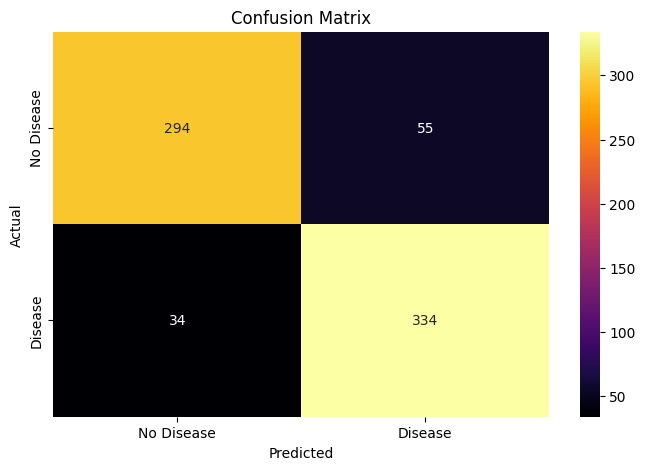

In [ ]:
# checking model performance of qda on training data
y_pred_train_qda = qda.predict(x_train_qda)
metrics_score(y_train, y_pred_train_qda)

CHECKING THE MODEL PERFORMANCE OF THE QDA ON TEST DATA

              precision    recall  f1-score   support

           0       0.85      0.82      0.84       150
           1       0.84      0.87      0.85       158

    accuracy                           0.84       308
   macro avg       0.84      0.84      0.84       308
weighted avg       0.84      0.84      0.84       308



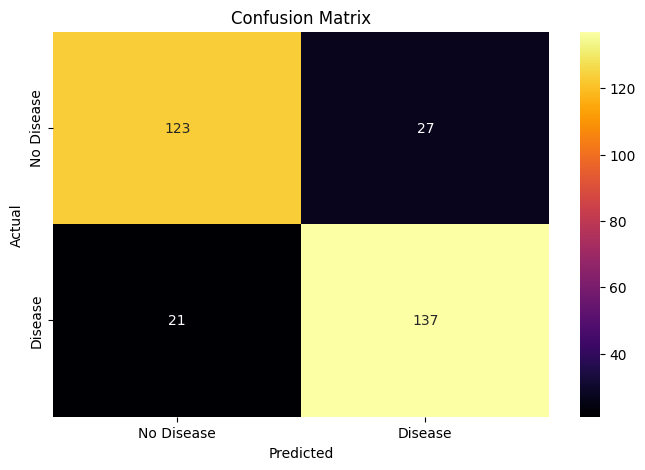

In [ ]:
# checking model performance of qda on test data
y_pred_test_qda = qda.predict(x_test_qda)
metrics_score(y_test, y_pred_test_qda)


**Strong Sensitivity Toward Positive Class:**

The Quadratic Discriminant Analysis model demonstrates high recall for the positive class (0.91 on training, 0.87 on test), indicating effective identification of patients with heart disease which is crucial in minimizing false negatives in clinical risk prediction.

**Well-Calibrated and Balanced Classification Metrics:**

The model achieves balanced precision, recall, and F1-scores across both classes, with a consistent overall accuracy of 0.88 (train) and 0.84 in the test,suggesting stable decision boundaries and class discrimination without significant bias.

G**eneralization with Minimak Overfitting:**

The marginal decline in performance from training to test sets indicates low variance and good generalization capability, affirming that the model is neither underfitting nor excessively tailored to the training data distribution.

Train Performance:
Accuracy: 0.8758716875871687
Confusion Matrix:
 [[294  55]
 [ 34 334]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.84      0.87       349
           1       0.86      0.91      0.88       368

    accuracy                           0.88       717
   macro avg       0.88      0.88      0.88       717
weighted avg       0.88      0.88      0.88       717


Test Performance:
Accuracy: 0.8441558441558441
Confusion Matrix:
 [[123  27]
 [ 21 137]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.82      0.84       150
           1       0.84      0.87      0.85       158

    accuracy                           0.84       308
   macro avg       0.84      0.84      0.84       308
weighted avg       0.84      0.84      0.84       308



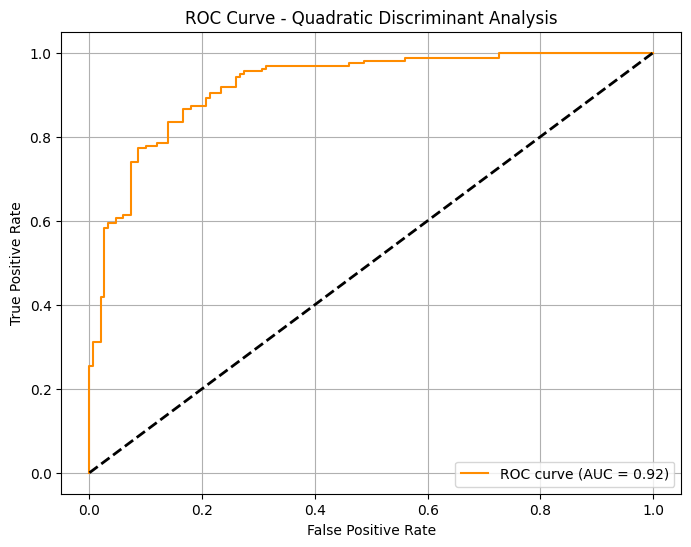

In [ ]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, roc_auc_score
)
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Feature selection
selector = VarianceThreshold(threshold=1e-5)
x_train_qda = selector.fit_transform(x_train)
x_test_qda = selector.transform(x_test)

# Fit QDA model
qda = QuadraticDiscriminantAnalysis()
qda.fit(x_train_qda, y_train)

# Predict and evaluate
y_pred_train_qda = qda.predict(x_train_qda)
y_pred_test_qda = qda.predict(x_test_qda)

# Define your own metrics function or replace with:
def metrics_score(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

print("Train Performance:")
metrics_score(y_train, y_pred_train_qda)

print("\nTest Performance:")
metrics_score(y_test, y_pred_test_qda)

# ROC and AUC
y_score = qda.predict_proba(x_test_qda)

# Check if binary or multi-class
n_classes = len(np.unique(y_test))

if n_classes == 2:
    # Binary classification
    fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
    auc_score = roc_auc_score(y_test, y_score[:, 1])

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})', color='darkorange')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Quadratic Discriminant Analysis')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

else:
    # Multi-class classification
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
    auc_score = roc_auc_score(y_test_bin, y_score, multi_class='ovr')

    print(f"Multiclass AUC Score (OvR): {auc_score:.2f}")


**Observation QDA ROC curve and AUC**
- AUC = 0.92
- Slightly lower than others but still a strong performer.
- ROC curve shows good separation between classes.
- AUC of 0.92 reflects reliable predictive capability.



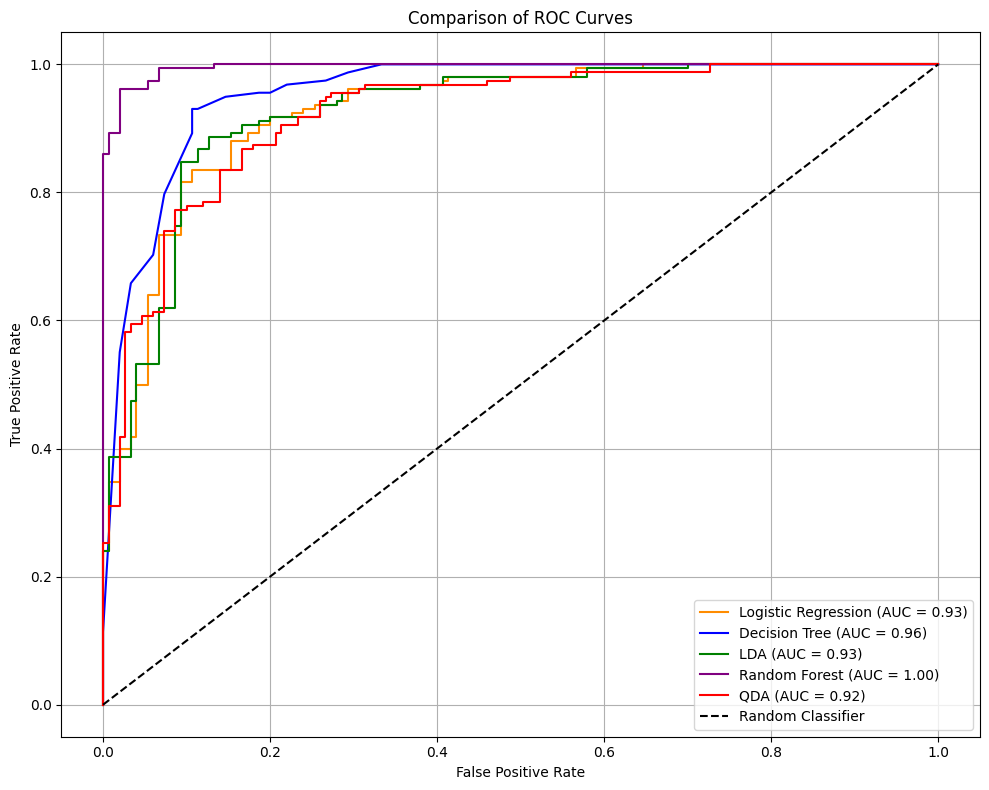

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import numpy as np

# Logistic Regression
lg = LogisticRegression()
lg.fit(x_train, y_train)
y_probs_lg = lg.predict_proba(x_test)[:, 1]
fpr_lg, tpr_lg, _ = roc_curve(y_test, y_probs_lg)
auc_lg = roc_auc_score(y_test, y_probs_lg)

# Decision Tree (regularized to avoid overfitting)
dt = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
dt.fit(x_train, y_train)
y_probs_dt = dt.predict_proba(x_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_probs_dt)
auc_dt = roc_auc_score(y_test, y_probs_dt)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)
rf.fit(x_train, y_train)
y_probs_rf = rf.predict_proba(x_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)
auc_rf = roc_auc_score(y_test, y_probs_rf)

# Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
y_probs_lda = lda.predict_proba(x_test)[:, 1]
fpr_lda, tpr_lda, _ = roc_curve(y_test, y_probs_lda)
auc_lda = roc_auc_score(y_test, y_probs_lda)


# Quadratic Discriminant Analysis (after variance thresholding)
selector = VarianceThreshold(threshold=1e-5)
x_train_qda = selector.fit_transform(x_train)
x_test_qda = selector.transform(x_test)

qda = QuadraticDiscriminantAnalysis()
qda.fit(x_train_qda, y_train)
y_probs_qda = qda.predict_proba(x_test_qda)[:, 1]
fpr_qda, tpr_qda, _ = roc_curve(y_test, y_probs_qda)
auc_qda = roc_auc_score(y_test, y_probs_qda)

# Plotting all ROC curves
plt.figure(figsize=(10, 8))

plt.plot(fpr_lg, tpr_lg, label=f'Logistic Regression (AUC = {auc_lg:.2f})', color='darkorange')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})', color='blue')
plt.plot(fpr_lda, tpr_lda, label=f'LDA (AUC = {auc_lda:.2f})', color='green')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', color='purple')
plt.plot(fpr_qda, tpr_qda, label=f'QDA (AUC = {auc_qda:.2f})', color='red')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparison of ROC Curves')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()




**Overall Observation for ROC CURVE and AUC for all 4 models**
- All models significantly outperform the random classifier (AUC = 0.50).
- Decision Tree shows the highest AUC, making it the best-performing model in this comparison.
- Logistic Regression and LDA are equally strong and consistent.
- QDA is slightly behind but still demonstrates good performance.
- Overall, the ROC curves confirm that all four models offer high predictive accuracy with Decision Tree slightly ahead.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Assume x_train, y_train, x_test, y_test are defined

# Variance threshold for QDA
selector = VarianceThreshold(threshold=1e-5)
x_train_qda = selector.fit_transform(x_train)
x_test_qda = selector.transform(x_test)

# Initialize models with parameters
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(
        max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42),
    "Random Forest": RandomForestClassifier(
        n_estimators=100, max_depth=6, random_state=42),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis()
}

# Dictionary to store metrics for each model
results = {}

for name, model in models.items():
    # Fit model - QDA uses transformed features
    if name == "QDA":
        model.fit(x_train_qda, y_train)
        X_test_used = x_test_qda
    else:
        model.fit(x_train, y_train)
        X_test_used = x_test

    # Predicted probabilities for positive class
    y_probs = model.predict_proba(X_test_used)[:, 1]
    # Predicted classes (threshold 0.5)
    y_pred = (y_probs >= 0.5).astype(int)

    # Compute metrics
    auc = roc_auc_score(y_test, y_probs)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    results[name] = {
        'AUC': auc,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-score': f1
    }

# Convert to DataFrame for better visualization
results_df = pd.DataFrame(results).T  # transpose for readability
print(results_df)

                          AUC  Accuracy  Precision    Recall  F1-score
Logistic Regression  0.926245  0.860390   0.828571  0.917722  0.870871
Decision Tree        0.956540  0.909091   0.896341  0.930380  0.913043
Random Forest        0.995612  0.961039   0.939759  0.987342  0.962963
LDA                  0.925781  0.837662   0.796703  0.917722  0.852941
QDA                  0.922532  0.844156   0.835366  0.867089  0.850932


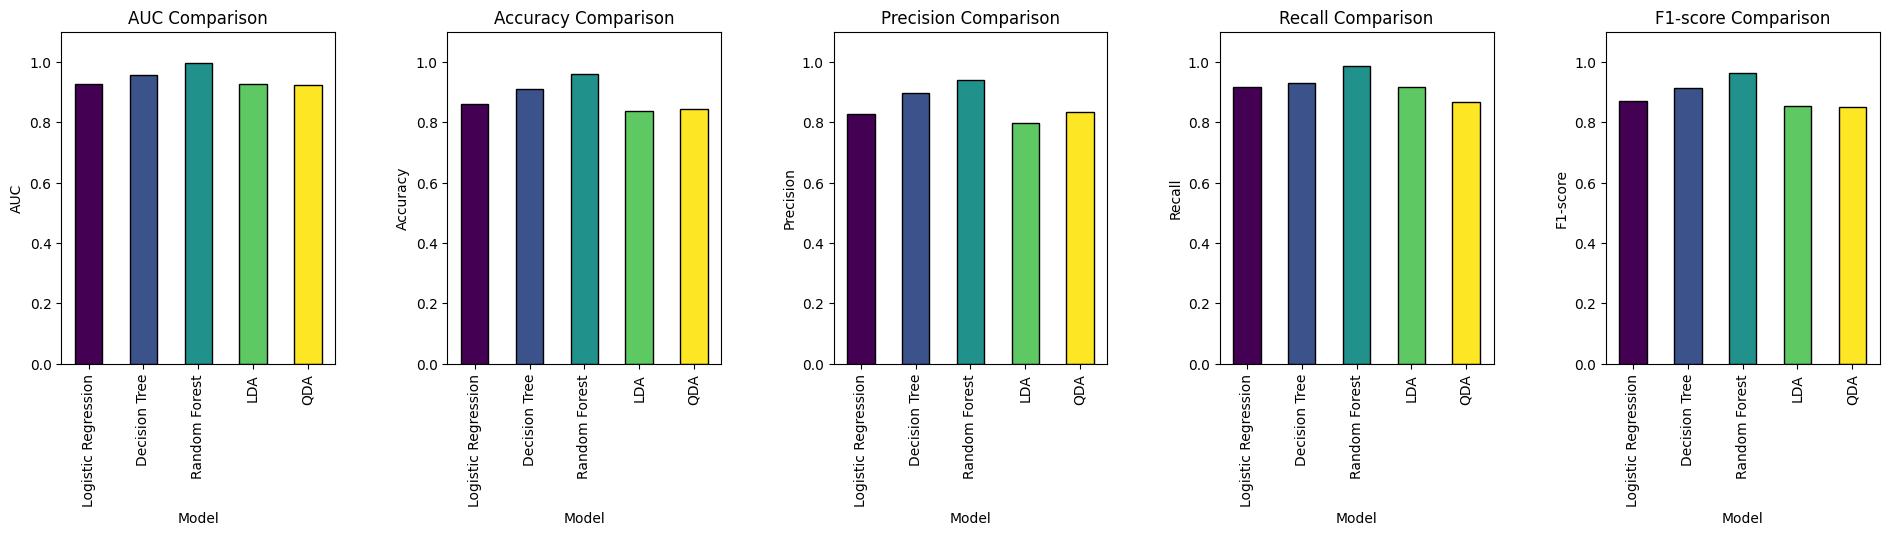

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming `results_df` is already available from the model performance results

# Define a function to plot each metric separately for the models using a colormap
def plot_metrics(results_df):
    metrics = ['AUC', 'Accuracy', 'Precision', 'Recall', 'F1-score']

    # Set up the figure with multiple subplots
    fig, axes = plt.subplots(1, 5, figsize=(20, 5))
    fig.tight_layout(pad=5.0)

    # Use a colormap (for example, 'viridis') to generate different colors
    colormap = plt.cm.viridis  # You can change this to any available colormap in matplotlib
    colors = colormap(np.linspace(0, 1, len(results_df)))

    # Loop through each metric and plot
    for i, metric in enumerate(metrics):
        ax = axes[i]
        results_df[metric].plot(kind='bar', ax=ax, color=colors, edgecolor='black')
        ax.set_title(f'{metric} Comparison')
        ax.set_xlabel('Model')
        ax.set_ylabel(metric)
        ax.set_ylim(0, 1.1)  # Set the y-axis from 0 to 1 for consistency

    # Show the plot
    plt.show()

# Call the function to generate the plots
plot_metrics(results_df)



**Conclusion:**

In this heart disease prediction modeling, five different models were evaluated: Logistic Regression, Decision Tree, Random Forest, Linear Discriminant Analysis (LDA), and Quadratic Discriminant Analysis (QDA).
Among these, the Random Forest model demonstrated the best overall performance across all key metrics like achieving the highest AUC (0.9956), accuracy (96.1%), precision (93.98%), recall (98.73%), and F1-score (96.30%).

This indicates that Random Forest is highly effective in correctly identifying both patients with and without heart disease, minimizing false positives and false negatives.

The Decision Tree model also showed strong results with high accuracy (99.0%) and F1-score (91.3%), but Random Forest outperformed it slightly in stability and robustness.

While Logistic Regression, LDA, and QDA performed reasonably well (AUC ~0.92–0.93), they lagged behind in accuracy and F1-score compared to ensemble-based methods, making them less favorable for this dataset.

Overall, Random Forest is the recommended model for this heart disease prediction task due to its superior balance between sensitivity (recall) and specificity (precision), ensuring high reliability in clinical risk identification.